In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from utils_ import Dorms

In [3]:
bn = gum.BayesNet('Student Dorms')
dorm_1 = Dorms("Bismarkstrasse", "Bismarkstrasse 4", "Bonn", "46 Single room in shared flat and 8 Double-Apartments", "from 289 to 436 euros for s Single room and from 507 to 812 euros for a Double-Apartement")
dorm_2 = Dorms("Drussusstrasse", "Drussusstrasse 17", "Bonn", "73 Apartements", "from 245 to 642 euros")
dorm_3 = Dorms("Europaring", "Europaring 2", "Sankt Augustin", "49 Apartements", "from 346 to 493 euros")
dorm_4 = Dorms("StuHaus", "StuHaus", "Sankt Augustin", "106 Double or Shared Apartments and 60 Single Apartments", "from 395 to 413 euros for a Double Apartment and from 493 to 496 euros for a Single Apartment")
dorm_5 = Dorms("Keramikerstrasse", "Keramikerstrasse 38", "Rheinbach", "30 Apartments ", "from 336 to 472 euros")
dorm_6 = Dorms("Wg_gesucht", "Wg_gesucht", "Rheinbach", "Single room in shared flat", "from 400 to 500 euros" )

dorm_names = [dorm_1, dorm_2, dorm_3, dorm_4, dorm_5, dorm_6]
limited_budget = bn.add(gum.LabelizedVariable('limited_budget', 'Limited Budget', ['True', 'False']))
pay_more_for_own_flat = bn.add(gum.LabelizedVariable('pay_more_for_own_flat', 'Pay more for own flat', ['True', 'False']))
shared_common_space = bn.add(gum.LabelizedVariable('shared_common_space', 'Shared Common Space', ['True', 'False']))
uni_location = bn.add(gum.LabelizedVariable('uni_location', 'University location', ['University of Bonn','HBRS in Sankt Augustin','HBRS in Rheinbach']))
expensive = bn.add(gum.LabelizedVariable('expensive', 'Expensive', ['True', 'False']))
loc_pref = bn.add(gum.LabelizedVariable('location_preference', 'Location Preference', ['Bonn', 'Sankt Augustin', 'Rheinbach']))
is_social = bn.add(gum.LabelizedVariable('is_social', 'Is Social', ['True', 'False']))

student_dorm = bn.add(gum.LabelizedVariable('student_dorm', 'Student Dorm', ['Bismarkstrasse 4', 'Drussusstrasse 17', 'Europaring 2', 'StuHaus', 'Keramikerstrasse 38', 'Wg_gesucht']))


In [4]:
bn.addArc(limited_budget,expensive)
bn.addArc(pay_more_for_own_flat,expensive)
bn.addArc(pay_more_for_own_flat,is_social)
bn.addArc(shared_common_space,is_social)
bn.addArc(uni_location,loc_pref)
bn.addArc(is_social,loc_pref)
bn.addArc(expensive,loc_pref)

bn.addArc(loc_pref,student_dorm)
bn.addArc(is_social,student_dorm)
bn.addArc(expensive,student_dorm)

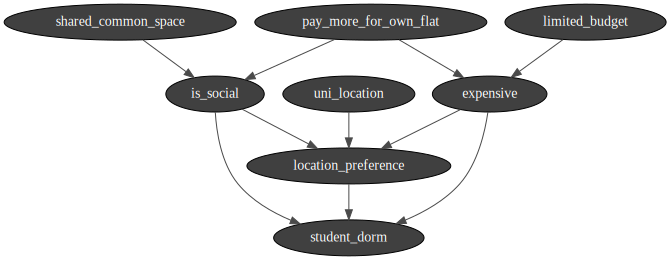

In [5]:
gnb.showBN(bn, size='30')

In [6]:
bn.cpt(limited_budget).fillWith([0.8,0.2])
bn.cpt(pay_more_for_own_flat).fillWith([0.7,0.3])
bn.cpt(shared_common_space).fillWith([0.5,0.5])
bn.cpt(uni_location).fillWith([0.333, 0.333, 0.334])

(pyAgrum.Potential<double>@0x55cee06dc350) 
  uni_location               |
Universit|HBRS in S|HBRS in R|
---------|---------|---------|
 0.3330  | 0.3330  | 0.3340  |

In [7]:
bn.cpt(expensive)[{"limited_budget": "True", "pay_more_for_own_flat": "True"}] = [0.5, 0.5]
bn.cpt(expensive)[{"limited_budget": "False", "pay_more_for_own_flat": "False"}] = [0.1, 0.9]    
bn.cpt(expensive)[{"limited_budget": "False", "pay_more_for_own_flat": "True"}] = [0.9, 0.1]
bn.cpt(expensive)[{"limited_budget": "True", "pay_more_for_own_flat": "False"}] = [0.1, 0.9]
bn.cpt(expensive)

(pyAgrum.Potential<double>@0x55cee057e090) 
             ||  expensive        |
limite|pay_mo||True     |False    |
------|------||---------|---------|
True  |True  || 0.5000  | 0.5000  |
False |True  || 0.9000  | 0.1000  |
True  |False || 0.1000  | 0.9000  |
False |False || 0.1000  | 0.9000  |

In [8]:
bn.cpt(is_social)[{"pay_more_for_own_flat": "True", "shared_common_space": "True"}] = [0.5, 0.5]
bn.cpt(is_social)[{"pay_more_for_own_flat": "False", "shared_common_space": "False"}] = [0.2, 0.8]
bn.cpt(is_social)[{"pay_more_for_own_flat": "True", "shared_common_space": "False"}] = [0.9, 0.1]
bn.cpt(is_social)[{"pay_more_for_own_flat": "False", "shared_common_space": "True"}] = [0.1, 0.9]
bn.cpt(is_social)

(pyAgrum.Potential<double>@0x55cee0667e20) 
             ||  is_social        |
pay_mo|shared||True     |False    |
------|------||---------|---------|
True  |True  || 0.5000  | 0.5000  |
False |True  || 0.1000  | 0.9000  |
True  |False || 0.9000  | 0.1000  |
False |False || 0.2000  | 0.8000  |

In [9]:
bn.cpt(loc_pref)[{"expensive": "True", "uni_location": "University of Bonn", "is_social": "True"}] = [0.8, 0.1, 0.1]
bn.cpt(loc_pref)[{"expensive": "False", "uni_location": "HBRS in Sankt Augustin", "is_social": "False"}] = [0.1, 0.8, 0.1]
bn.cpt(loc_pref)[{"expensive": "True", "uni_location": "HBRS in Rheinbach", "is_social": "True"}] = [0.4, 0.0, 0.6]
bn.cpt(loc_pref)[{"expensive": "False", "uni_location": "University of Bonn", "is_social": "False"}] = [0.5, 0.25, 0.25]
bn.cpt(loc_pref)[{"expensive": "True", "uni_location": "HBRS in Sankt Augustin", "is_social": "True"}] = [0.3, 0.7, 0.0]
bn.cpt(loc_pref)[{"expensive": "False", "uni_location": "HBRS in Rheinbach", "is_social": "False"}] = [0.1, 0.0, 0.9]
bn.cpt(loc_pref)[{"expensive": "False", "uni_location": "University of Bonn", "is_social": "True"}] = [0.8, 0.1, 0.1]
bn.cpt(loc_pref)[{"expensive": "True", "uni_location": "HBRS in Sankt Augustin", "is_social": "False"}] = [0.1, 0.9, 0.0]
bn.cpt(loc_pref)[{"expensive": "True", "uni_location": "HBRS in Rheinbach", "is_social": "False"}] = [0.1, 0.0, 0.9]
bn.cpt(loc_pref)[{"expensive": "True", "uni_location": "University of Bonn", "is_social": "False"}] = [0.8, 0.1, 0.1]
bn.cpt(loc_pref)[{"expensive": "False", "uni_location": "HBRS in Sankt Augustin", "is_social": "True"}] = [0.1, 0.8, 0.1]
bn.cpt(loc_pref)[{"expensive": "False", "uni_location": "HBRS in Rheinbach", "is_social": "True"}] = [0.1, 0.0, 0.9]
bn.cpt(loc_pref)


(pyAgrum.Potential<double>@0x55cee076fae0) 
                    ||  location_preference        |
uni_lo|is_soc|expens||Bonn     |Sankt Aug|Rheinbach|
------|------|------||---------|---------|---------|
Univer|True  |True  || 0.8000  | 0.1000  | 0.1000  |
HBRS i|True  |True  || 0.3000  | 0.7000  | 0.0000  |
HBRS i|True  |True  || 0.4000  | 0.0000  | 0.6000  |
Univer|False |True  || 0.8000  | 0.1000  | 0.1000  |
HBRS i|False |True  || 0.1000  | 0.9000  | 0.0000  |
HBRS i|False |True  || 0.1000  | 0.0000  | 0.9000  |
Univer|True  |False || 0.8000  | 0.1000  | 0.1000  |
HBRS i|True  |False || 0.1000  | 0.8000  | 0.1000  |
HBRS i|True  |False || 0.1000  | 0.0000  | 0.9000  |
Univer|False |False || 0.5000  | 0.2500  | 0.2500  |
HBRS i|False |False || 0.1000  | 0.8000  | 0.1000  |
HBRS i|False |False || 0.1000  | 0.0000  | 0.9000  |

In [25]:
bn.cpt(student_dorm)[{"expensive": "True", "location_preference": "Bonn","is_social": "True" }] = [0.2, 0.6, 0.0, 0.1, 0.0, 0.1]
bn.cpt(student_dorm)[{"expensive": "True", "location_preference": "Bonn","is_social": "False" }] =  [0.6, 0.2, 0.1, 0.0, 0.1, 0.0]
bn.cpt(student_dorm)[{"expensive": "True", "location_preference": "Rheinbach","is_social": "True" }] = [0.0, 0.1, 0.0, 0.1, 0.2, 0.6]
bn.cpt(student_dorm)[{"expensive": "True", "location_preference": "Rheinbach","is_social": "False" }] = [0.1, 0.0, 0.1, 0.0, 0.6, 0.2]
bn.cpt(student_dorm)[{"expensive": "True", "location_preference": "Sankt Augustin","is_social": "False" }] = [0.1, 0.0, 0.6, 0.2, 0.1, 0.0]
bn.cpt(student_dorm)[{"expensive": "True", "location_preference": "Sankt Augustin","is_social": "True" }] = [0.0, 0.1, 0.2, 0.6, 0.0, 0.1]        

bn.cpt(student_dorm)[{"expensive": "False", "location_preference": "Bonn","is_social": "False" }] = [0.4, 0.4, 0.1, 0.0, 0.0, 0.1]
bn.cpt(student_dorm)[{"expensive": "False", "location_preference": "Bonn","is_social": "True"}] = [0.6, 0.2, 0.0, 0.1, 0.0, 0.1]
bn.cpt(student_dorm)[{"expensive": "False", "location_preference": "Sankt Augustin","is_social": "False" }] = [0.0, 0.1, 0.6, 0.2, 0.1, 0.0]  
bn.cpt(student_dorm)[{"expensive": "False", "location_preference": "Sankt Augustin","is_social": "True"}] = [0.1, 0.0, 0.2, 0.6, 0.0, 0.1]
bn.cpt(student_dorm)[{"expensive": "False", "location_preference": "Rheinbach","is_social": "False" }] = [0.0, 0.1, 0.1, 0.0, 0.6, 0.2]
bn.cpt(student_dorm)[{"expensive": "False", "location_preference": "Rheinbach","is_social": "True" }] = [0.1, 0.0, 0.0, 0.1, 0.2, 0.6]
                                                           
bn.cpt(student_dorm)

#gnb.showInference(bn,size="30")         

(pyAgrum.Potential<double>@0x55cee04f0210) 
                    ||  student_dorm                                             |
locati|is_soc|expens||Bismarkst|Drussusst|Europarin|StuHaus  |Keramiker|Wg_gesuch|
------|------|------||---------|---------|---------|---------|---------|---------|
Bonn  |True  |True  || 0.2000  | 0.6000  | 0.0000  | 0.1000  | 0.0000  | 0.1000  |
Sankt |True  |True  || 0.0000  | 0.1000  | 0.2000  | 0.6000  | 0.0000  | 0.1000  |
Rheinb|True  |True  || 0.0000  | 0.1000  | 0.0000  | 0.1000  | 0.2000  | 0.6000  |
Bonn  |False |True  || 0.6000  | 0.2000  | 0.1000  | 0.0000  | 0.1000  | 0.0000  |
Sankt |False |True  || 0.1000  | 0.0000  | 0.6000  | 0.2000  | 0.1000  | 0.0000  |
Rheinb|False |True  || 0.1000  | 0.0000  | 0.1000  | 0.0000  | 0.6000  | 0.2000  |
Bonn  |True  |False || 0.6000  | 0.2000  | 0.0000  | 0.1000  | 0.0000  | 0.1000  |
Sankt |True  |False || 0.1000  | 0.0000  | 0.2000  | 0.6000  | 0.0000  | 0.1000  |
Rheinb|True  |False || 0.1000  | 0.0000  | 0.0000  | 0.1000  | 0.2000  | 0.6000  |
Bonn  |False |False || 0.4000  | 0.4000  | 0.1000  | 0.0000  | 0.0000  | 0.1000  |
Sankt |False |False || 0.0000  | 0.1000  | 0.6000  | 0.2000  | 0.1000  | 0.0000  |
Rheinb|False |False || 0.0000  | 0.1000  | 0.1000  | 0.0000  | 0.6000  | 0.2000  |

In [24]:
def __call__(self, limited_budget: str, pay_more_for_own_flat: str, shared_common_space: str, uni_location:str):
    self.ie.setEvidence({'limited_budget': limited_budget, 'pay_more_for_own_flat': pay_more_for_own_flat, 'shared_common_space': shared_common_space, 'uni_location': uni_location})
    self.ie.makeInference()
    d = self.ie.posterior(self.student_dorm)
    mappedDorms = list(zip(self.dorm_names, d))
    sortedMappedDorms = sorted(mappedDorms, key=lambda x: x[1], reverse=True)
    return sortedMappedDorms
